In [1]:
# Setup - Import modules

import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [5]:
# Read csv file

earthquakes = pd.read_csv("C:\\temp\\Data Science\\Kaggle\\Data Cleaning Challenge\\Day 3\\earthquake-database\\database.csv")
landslides = pd.read_csv("C:\\temp\\Data Science\\Kaggle\\Data Cleaning Challenge\\Day 3\\landslide-events\catalog.csv")
volcanos = pd.read_csv("C:\\temp\\Data Science\\Kaggle\\Data Cleaning Challenge\\Day 3\\volcanic-eruptions\database.csv")

# Set seed for reproducibility
np.random.seed(0)


In [6]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [17]:
landslides['date'].dtype

dtype('O')

In [18]:
earthquakes.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [19]:
earthquakes['Date'].dtype

dtype('O')

In [40]:
earthquakes.shape

(23412, 21)

In [20]:
earthquakes['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

In [64]:
# Convert date String to datetime format and add to column date_parsed

earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%Y", infer_datetime_format= True, utc = True)

In [66]:
# Check column date_pased

earthquakes['date_parsed'].head()

0   1965-01-02 00:00:00+00:00
1   1965-01-04 00:00:00+00:00
2   1965-01-05 00:00:00+00:00
3   1965-01-08 00:00:00+00:00
4   1965-01-09 00:00:00+00:00
Name: date_parsed, dtype: datetime64[ns, UTC]

In [67]:
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

In [68]:
day_of_month_earthquakes

0         2
1         4
2         5
3         8
4         9
         ..
23407    28
23408    28
23409    28
23410    29
23411    30
Name: date_parsed, Length: 23412, dtype: int64

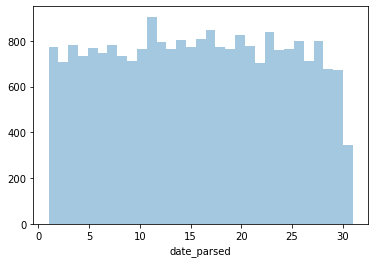

In [70]:
# Plot day of month

#remove NAs
day_of_month_earthquakes = day_of_month_earthquakes.dropna()

sns.distplot(day_of_month_earthquakes, kde=False, bins=31)